In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

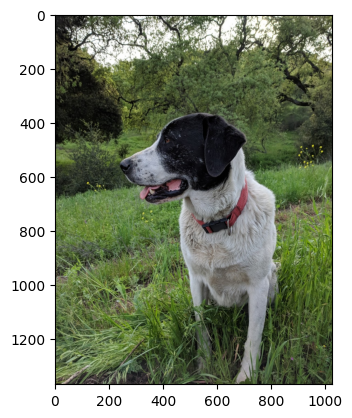

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

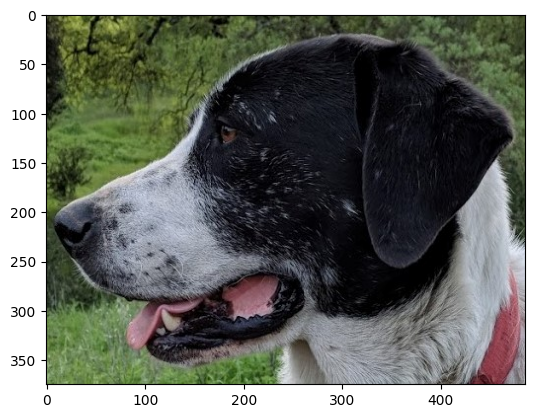

In [5]:
plt.imshow(face)

In [6]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

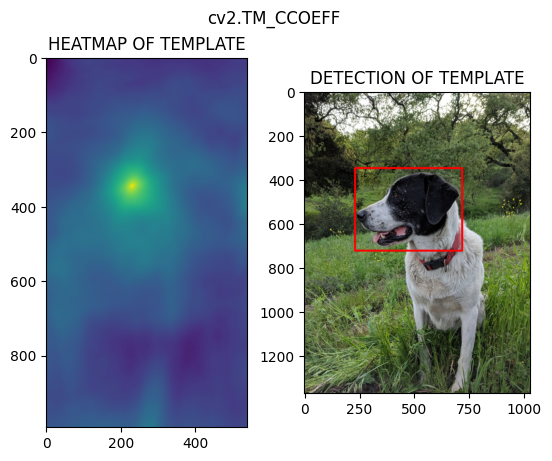

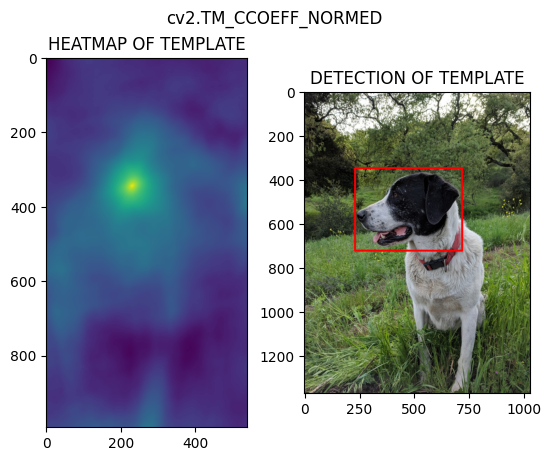

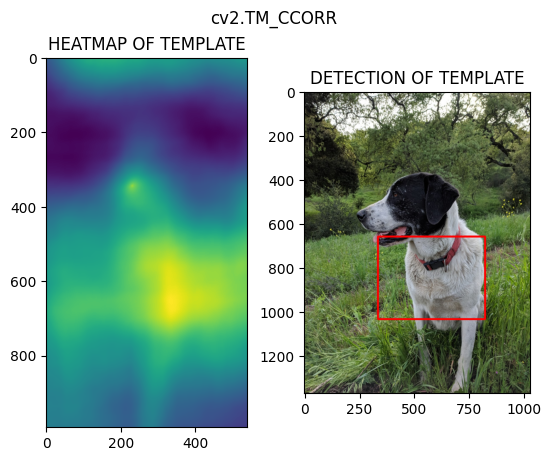

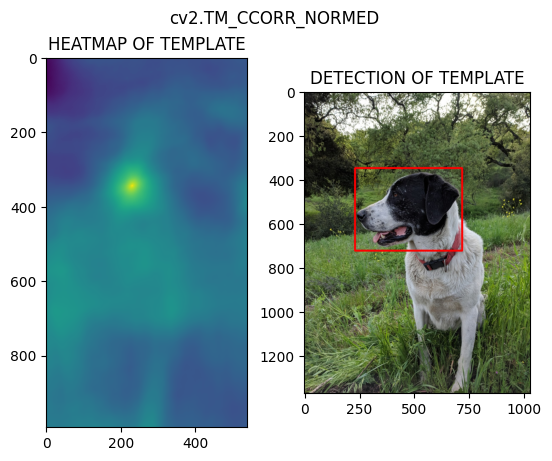

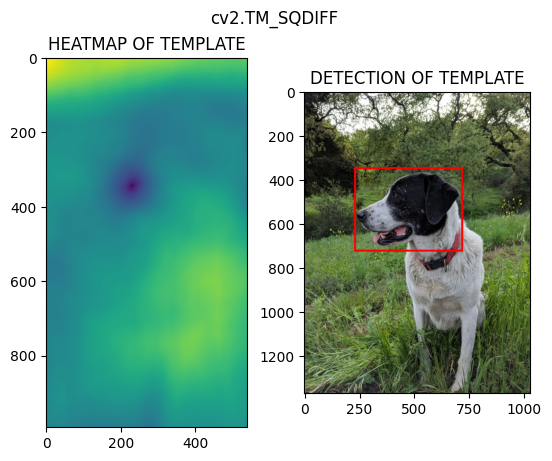

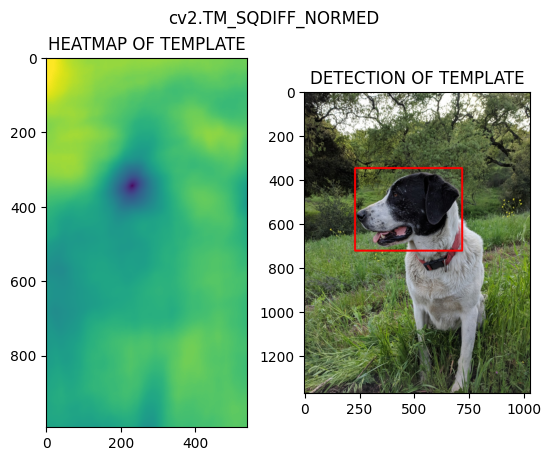

In [7]:
for m in methods:
    full_copy= full.copy()
    
    method= eval(m)
    
    res = cv2.matchTemplate(full_copy, face, method)
    min_val, max_val, min_loc, max_loc= cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left= min_loc
    else:
        top_left= max_loc
        
    height, width, channels= face.shape
        
    bottom_right=(top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 7)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    plt.suptitle(m)
    plt.show()
    print('\n')